In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
if "housing" in os.path.abspath(os.path.curdir): os.chdir("..")
BASE_DIR = os.path.abspath(os.path.curdir)

In [3]:
def load_csv(dir_name, file_name):
    csv_path = os.path.join(BASE_DIR, "datasets", dir_name, file_name)
    return pd.read_csv(csv_path)

In [4]:
class Library:
    
    def __init__(self, df):
        self.df = df
        self.df_copy = df.copy()
        self.attrs = {}
        
    def update_attrs(self, dict_):
        assert isinstance(dict_, dict), "only accepts dict type objects" 
        self.attrs.update(dict_)
        print(f"attributes library updated with key:{list(dict_.keys())}")
    
    def get_attrs(self):
        return self.attrs
    
    def get_df(self):
        return self.df

In [5]:
# dataset link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
df = load_csv("housing", "advanced_housing_train_kaggle.csv")

In [6]:
lib = Library(df)

## Basic EDA

### Identifying the types of data and features

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Id feature is simply unique ID, so it is not helpful for learning. Let's remove it.

In [8]:
df.drop("Id", axis=1, inplace=True)

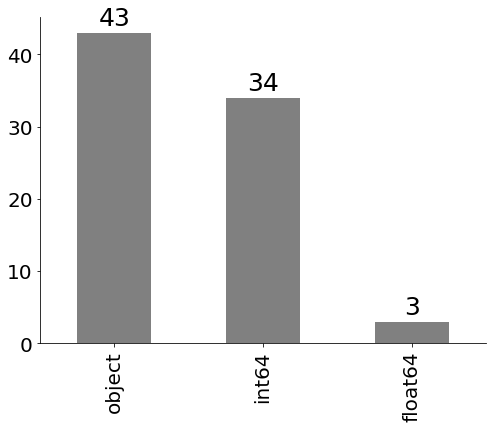

In [9]:
# Ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features
plt.figure(figsize = (8,6))
ax = df.dtypes.value_counts().plot(kind='bar', grid = False, fontsize=20, color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, height, ha = 'center', size = 25)
sns.despine()

#### Observations
    - there are 37 numerical columns.Out of which 34 are integers and 3 are float.
    - and 43 columns are categorical columns

In [10]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [11]:
labels = ["SalePrice"]
lib.update_attrs({"labels": labels})

attributes library updated with key:['labels']


In [12]:
cat_attrs = [c_ for c_ in df.columns if df[c_].dtypes == "object" and c_ not in labels]
lib.update_attrs({"cat_attrs": cat_attrs})

attributes library updated with key:['cat_attrs']


In [13]:
num_attrs = [c_ for c_ in df.columns if c_ not in cat_attrs+labels]
lib.update_attrs({"num_attrs": num_attrs})

attributes library updated with key:['num_attrs']


In [15]:
date_time_attrs = [c for c in num_attrs if "Yr" in c or "Year" in c and c not in labels]
lib.update_attrs({"date_time_attrs": date_time_attrs})

attributes library updated with key:['date_time_attrs']


In [16]:
dis_attrs = [c_ for c_ in num_attrs if len(df[c_].value_counts())/len(df) < 0.02 and c_ not in date_time_attrs+labels]
lib.update_attrs({"dis_attrs": dis_attrs})

attributes library updated with key:['dis_attrs']


In [17]:
cont_attrs = [c for c in num_attrs if c not in dis_attrs+date_time_attrs+labels]
lib.update_attrs({"cont_attrs": cont_attrs})

attributes library updated with key:['cont_attrs']


#### Observations
 - we categories the feautres into numeric, categorical, discrete, date_time, continuos and labels
 - as discrete, date_time and continuos is sub category of numerical data.
 - we can also sub-categories the categorical features but it needs some domain-knowledge so for now it left for future work

# Check missing values

#### For Numerical features

In [18]:
df[num_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
1,LotFrontage,259
24,GarageYrBlt,81
7,MasVnrArea,8
27,WoodDeckSF,0
20,BedroomAbvGr,0
21,KitchenAbvGr,0
22,TotRmsAbvGrd,0
23,Fireplaces,0
25,GarageCars,0
26,GarageArea,0


#### Observations
    - As we can see there are some missing features but we will cover it with EDA of numerical features

#### For Categorical Features

In [19]:
df[cat_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
38,PoolQC,1453
40,MiscFeature,1406
2,Alley,1369
39,Fence,1179
32,FireplaceQu,690
33,GarageType,81
36,GarageCond,81
35,GarageQual,81
34,GarageFinish,81
25,BsmtFinType2,38


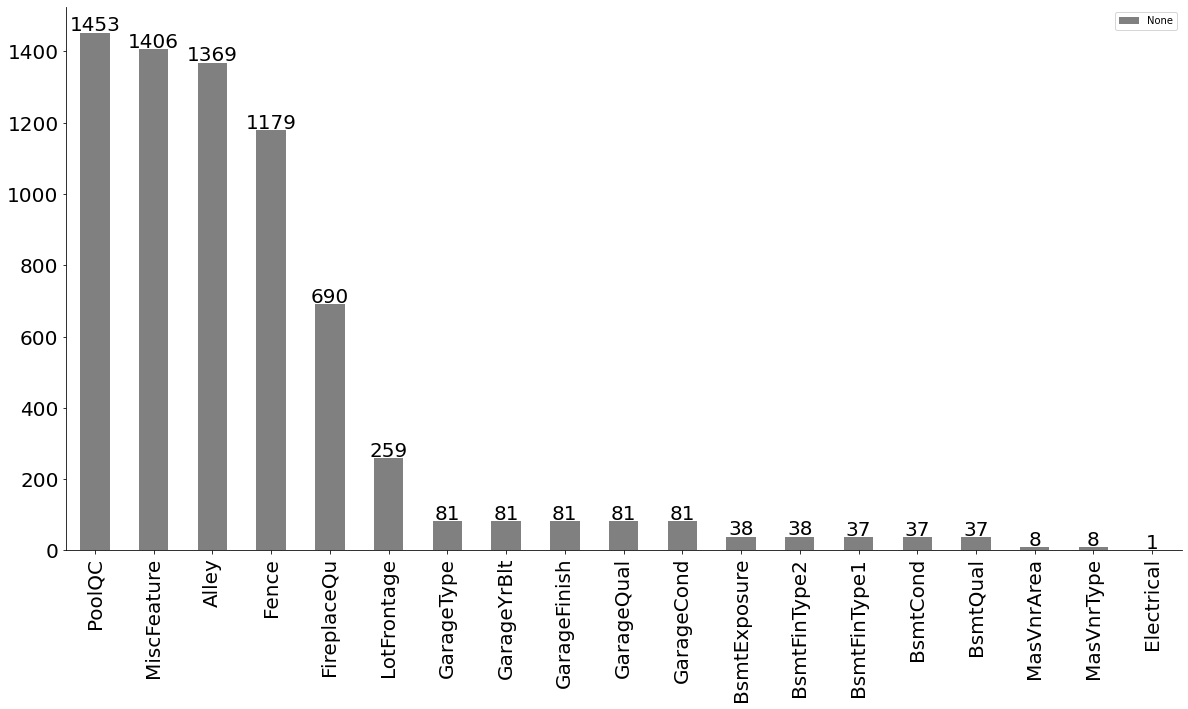

In [20]:
# ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features

isnull_series = df.loc[:,:'SaleCondition'].isnull().sum()
isnull_series[isnull_series > 0].sort_values(ascending=False)

plt.figure(figsize = (20,10))
ax = isnull_series[isnull_series > 0].sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.legend(loc = 'upper right')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 5, height, ha = 'center', size = 20)
sns.despine()

#### Observations
    - PoolQc, MiscFeature, Alley, Fence and FieplaceQu has too many missing values
    - Garage related feature has 81 missing values
    - Basement related feature has 38 missing values
    - we can replace missing values here also but it is more convinient to do with EDA on categorical datas

## Checking Target

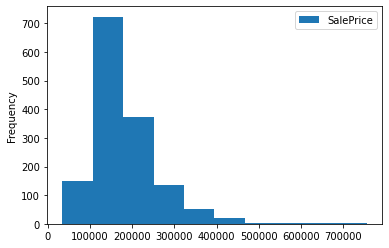

In [21]:
df[labels].plot.hist()
plt.show()

In [22]:
# just to check skewness 
# ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features
mean = df['SalePrice'].mean()
std = df['SalePrice'].std()
skew = df['SalePrice'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 180921.1959, std: 79442.5029, skew: 1.8829


#### Observations
    - As we can see here it is skewed plot
    - can be tranform to log scale for more optimizing the skewness

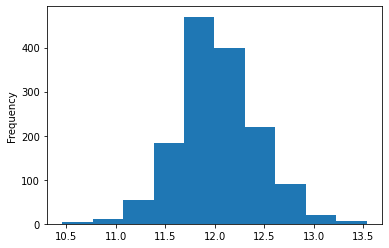

In [23]:
df["SalePriceCpy"] = np.log(df['SalePrice'])
df["SalePriceCpy"].plot.hist()
plt.show()

In [24]:
# just to check skewness 
mean = df['SalePriceCpy'].mean()
std = df['SalePriceCpy'].std()
skew = df['SalePriceCpy'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 12.0241, std: 0.3995, skew: 0.1213


####  Observations
    skewness is improved after log tranformation

In [25]:
labels_added_attrs = ["SalePriceCpy"]
lib.update_attrs({"labels_added_attrs": labels_added_attrs})

attributes library updated with key:['labels_added_attrs']


## EDA for numerical features

#### NOTE: histogram is better choice for continuos/discrete feature and bar is for discrete feature

In [26]:
df[num_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
1,LotFrontage,259
24,GarageYrBlt,81
7,MasVnrArea,8
27,WoodDeckSF,0
20,BedroomAbvGr,0
21,KitchenAbvGr,0
22,TotRmsAbvGrd,0
23,Fireplaces,0
25,GarageCars,0
26,GarageArea,0


#### Relationship of missing value with target variable

In [27]:
import math

def plot_bar_with_missing(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    
    attr_list = [attr for attr in df.columns if df[attr].isnull().sum()>=1]
    
    data = df.copy()
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        data[attr] = np.where(data[attr].isnull(), 1, 0)
        data.groupby(attr)[with_].median().plot.bar()
        plt.title(attr)
    plt.show()
    
    del data

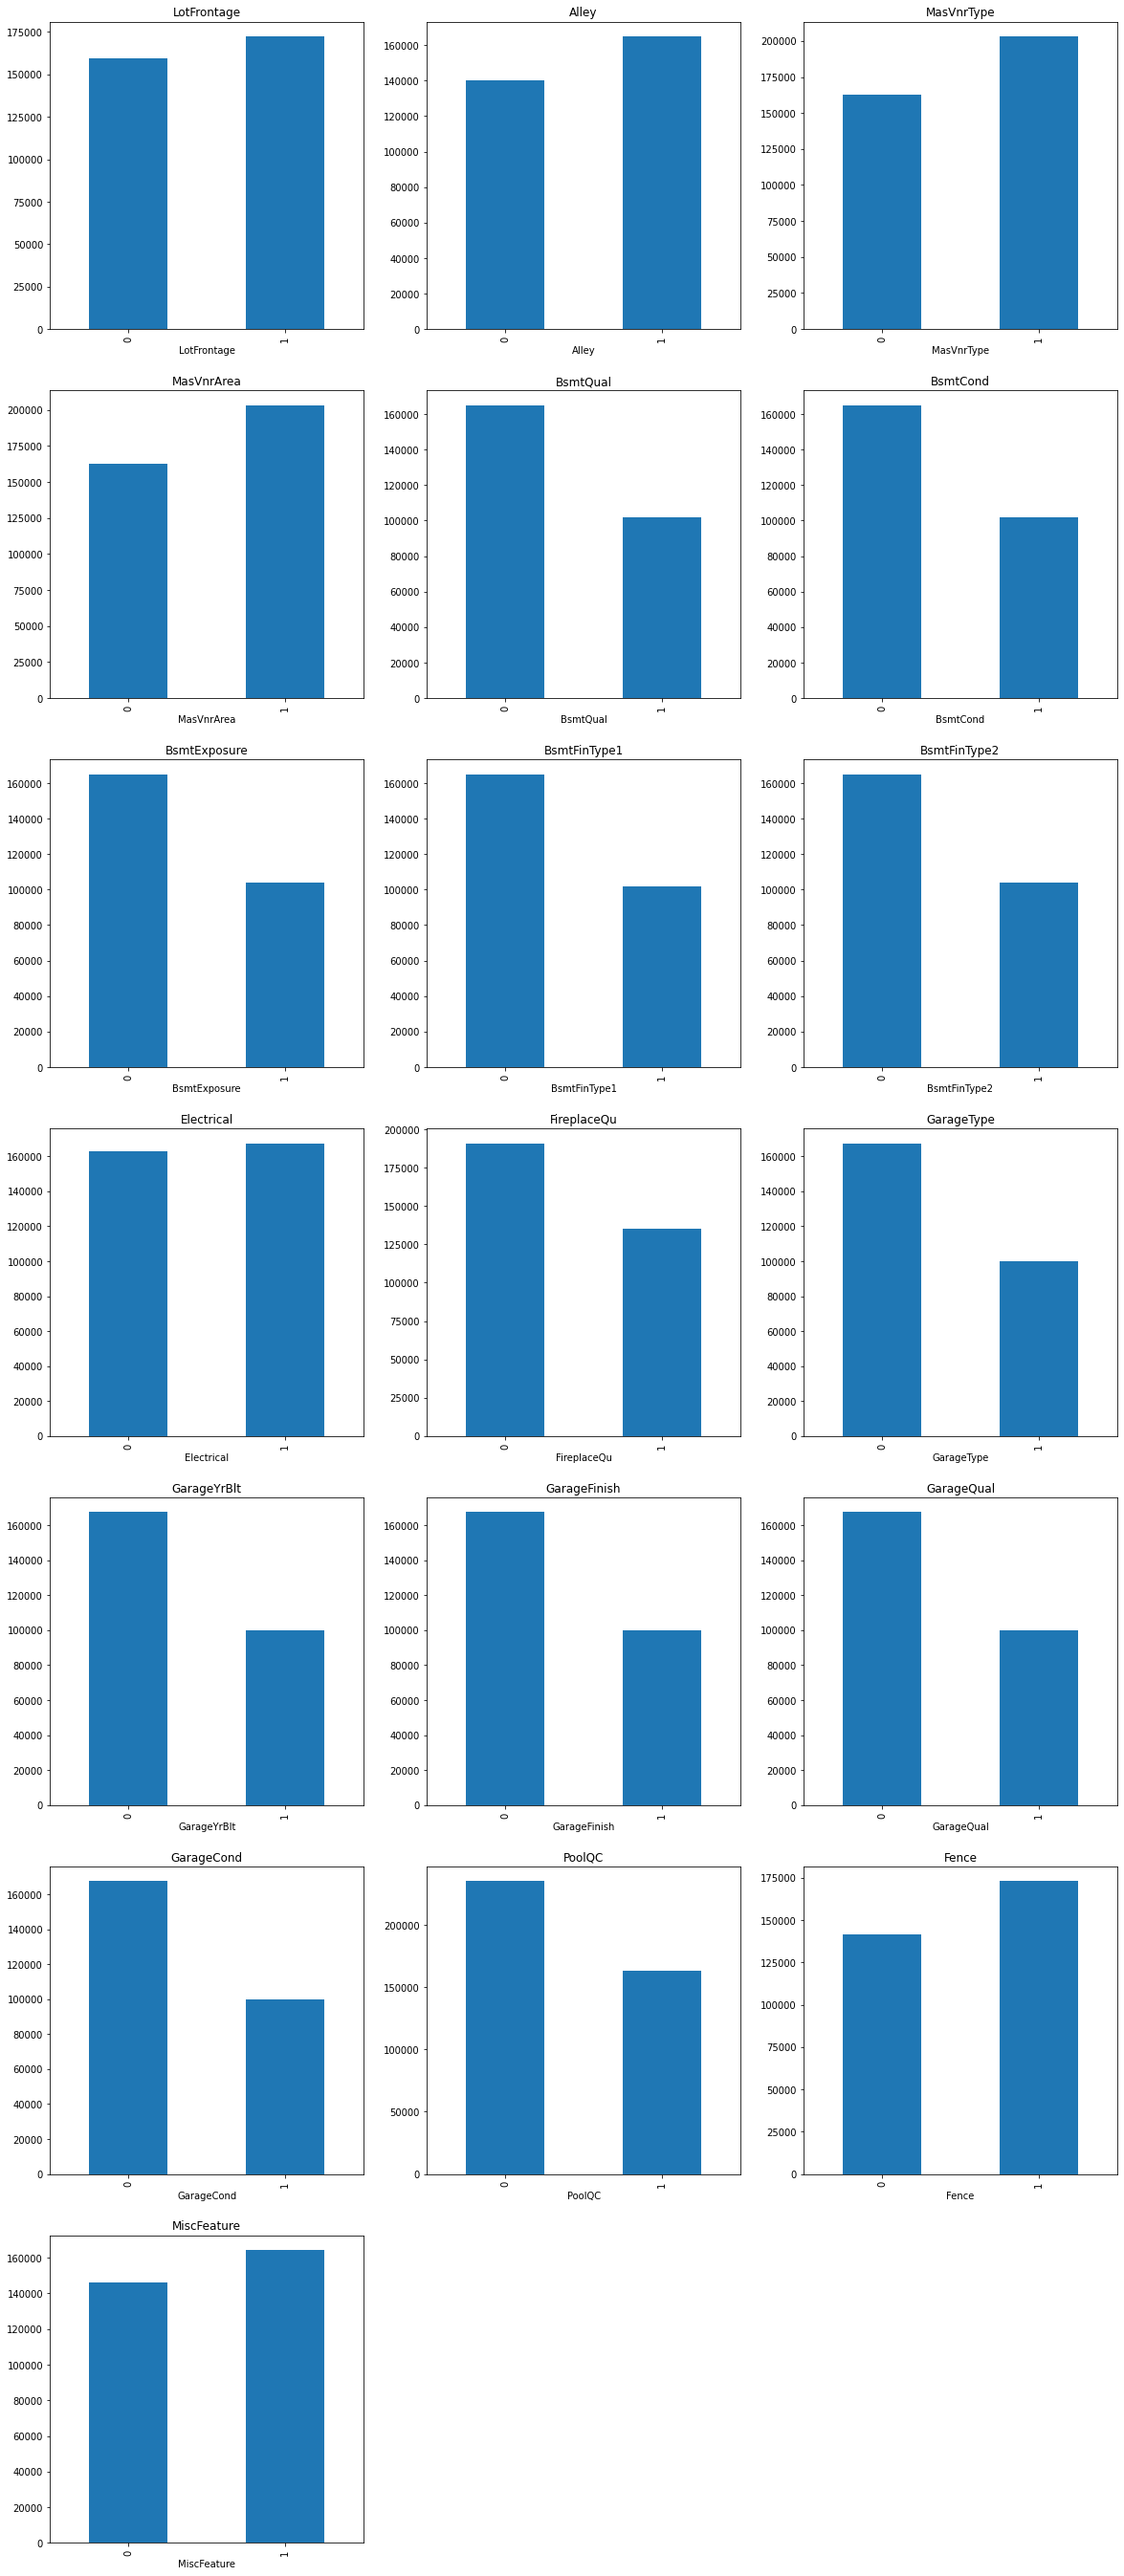

In [28]:
plot_bar_with_missing(df, num_attrs, "SalePrice")

**NOTE:** Do some basic ispecting bofore imuting missing values

#### Missing value imputation

In [29]:
# imputing missing values for numerical features
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(df[num_attrs])

print(imputer.statistics_)

X = imputer.transform(df[num_attrs]) # X will be numpy array
df_num_tr = pd.DataFrame(X, columns=[df[num_attrs].columns], index=[df[num_attrs].index])

[5.0000e+01 6.9000e+01 9.4785e+03 6.0000e+00 5.0000e+00 1.9730e+03
 1.9940e+03 0.0000e+00 3.8350e+02 0.0000e+00 4.7750e+02 9.9150e+02
 1.0870e+03 0.0000e+00 0.0000e+00 1.4640e+03 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 6.0000e+00 1.0000e+00
 1.9800e+03 2.0000e+00 4.8000e+02 0.0000e+00 2.5000e+01 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 6.0000e+00 2.0080e+03]


In [30]:
df_num_tr.isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,level_0,count_null
0,MSSubClass,0
1,LotFrontage,0
20,BedroomAbvGr,0
21,KitchenAbvGr,0
22,TotRmsAbvGrd,0
23,Fireplaces,0
24,GarageYrBlt,0
25,GarageCars,0
26,GarageArea,0
27,WoodDeckSF,0


In [31]:
for c in num_attrs:
    df[c] = df_num_tr[c].values

In [32]:
df[num_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
0,MSSubClass,0
1,LotFrontage,0
20,BedroomAbvGr,0
21,KitchenAbvGr,0
22,TotRmsAbvGrd,0
23,Fireplaces,0
24,GarageYrBlt,0
25,GarageCars,0
26,GarageArea,0
27,WoodDeckSF,0


#### Observations
    - we have replaced missing values with meadin using sklearn simple imputer

### Discrete Features

In [33]:
# histogram is good for numerical/discrete values
import math

def plot_hist(df, attr_list, column=3, width=20, height=None):
    column = column
    row = math.ceil(len(attr_list)/column) # returns next integer value
    width = width
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    for i, atr in enumerate(attr_list):
        bins = df[atr].nunique() if df[atr].nunique() < 25 else 25
        plt.subplot(row, column, i+1)
        plt.hist(df[atr], bins=bins)
        plt.title(atr)
        plt.ylabel("counts")
        plt.xlabel("values")
    plt.show()

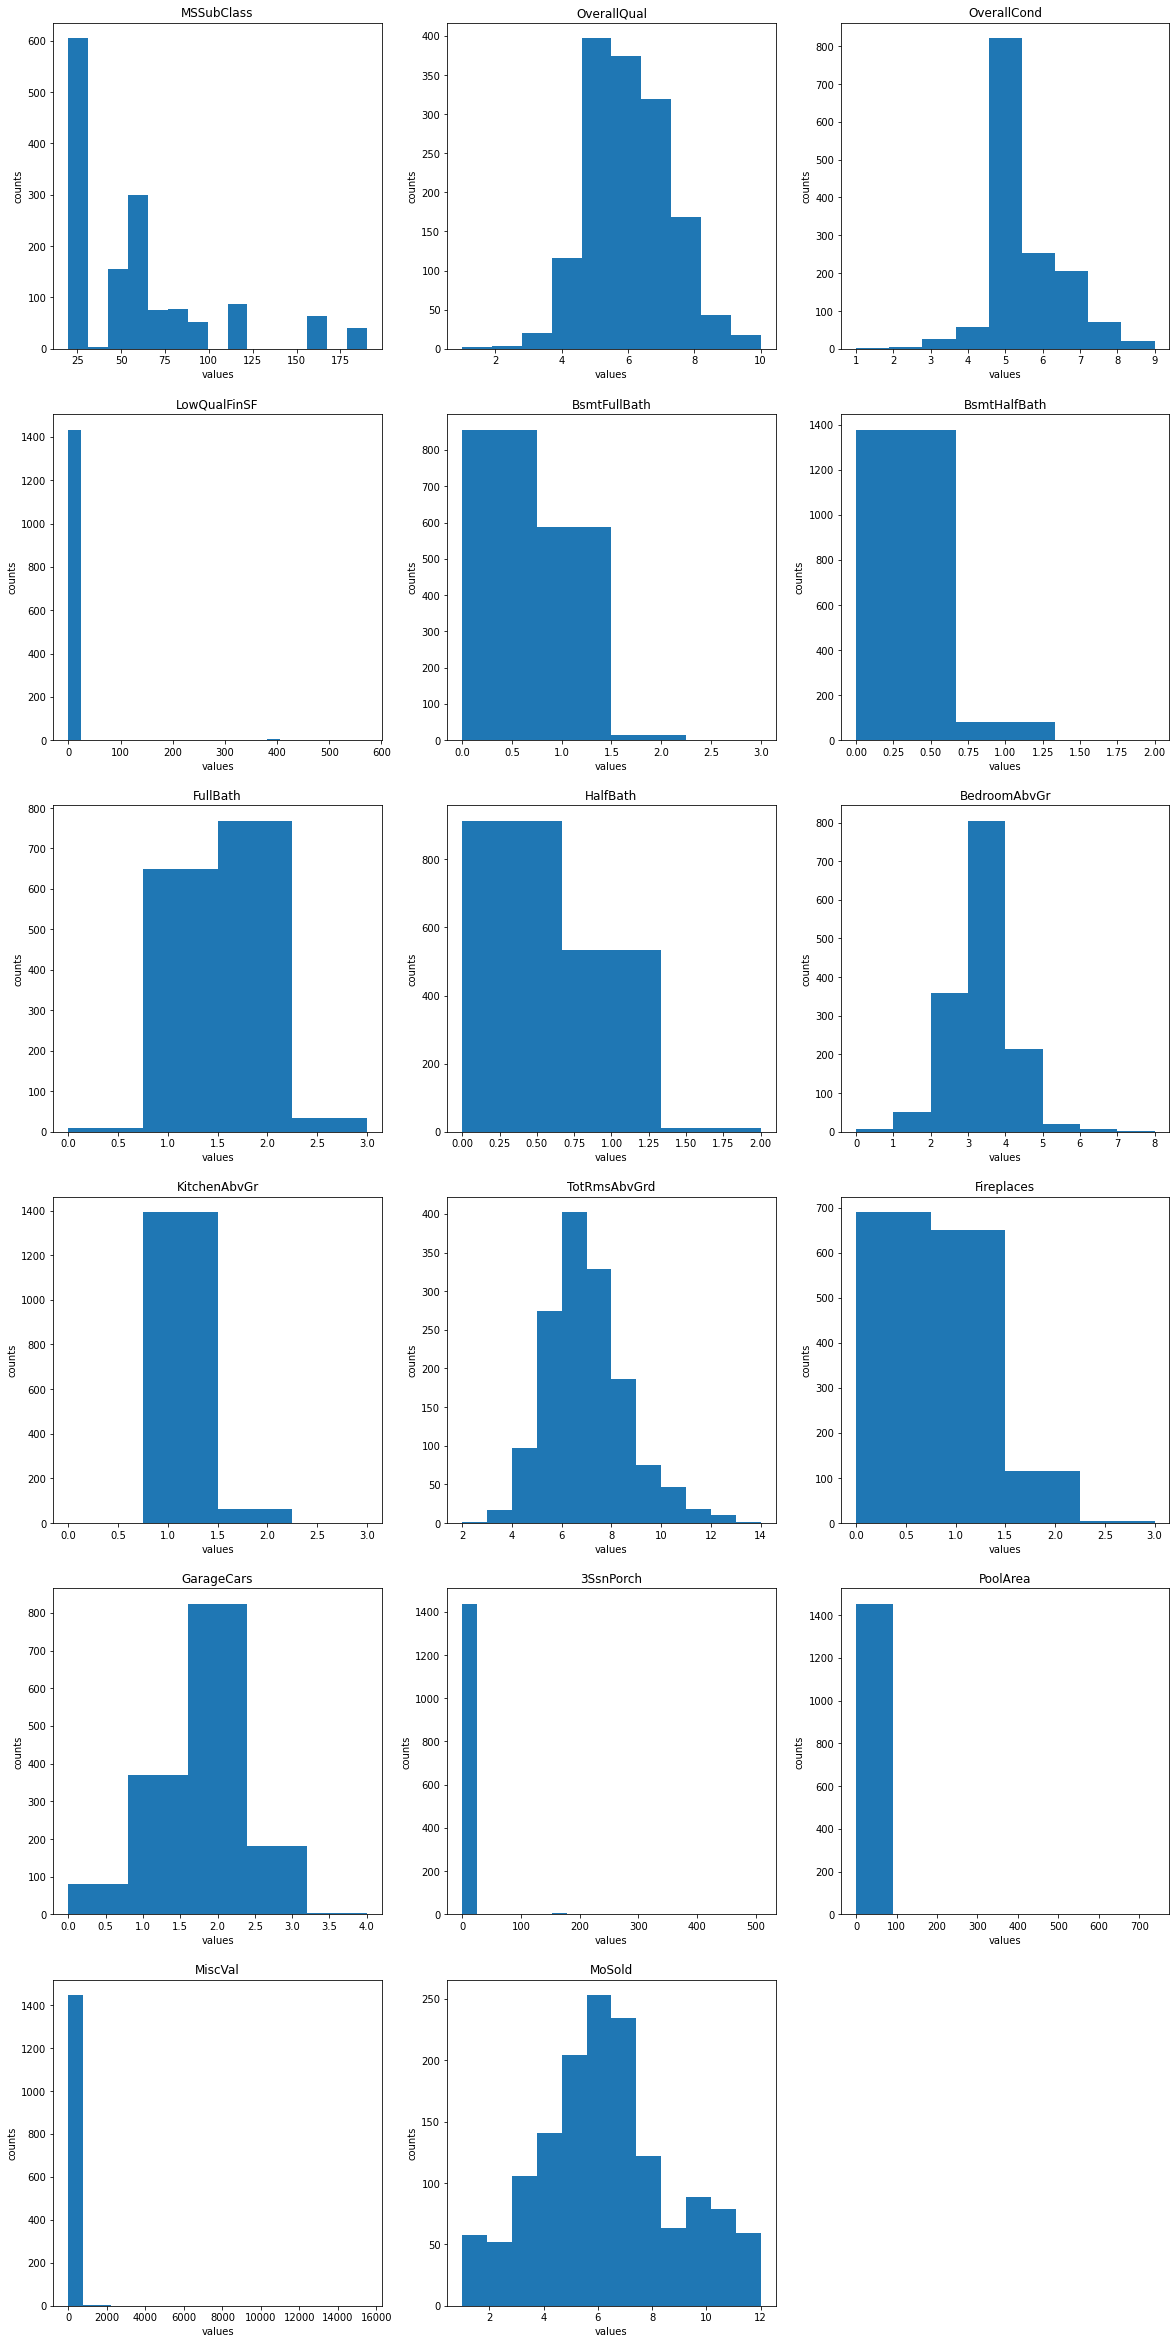

In [34]:
plot_hist(df, dis_attrs)

#### Observations
    - some of the features are biased so need to be identify with some parameters
    - some of the featuers are skewed like MSSubClass, BsmtFullBath, BsmtHalfBath, HalfBath, Fireplaces etc.

In [35]:
def get_biased_attrs(df, list_, ratio=0.9):
    """
    Function gives biased attributes with respect to ratio specified.
    
    Note:The term bias means the high frequency occurance of single value
    in whole feature set.
    """
    attrs = []
    for attr in list_:
        max_values = df[attr].value_counts(ascending=False).values[0]   
        if max_values / len(df[attr]) >= ratio: attrs.append(attr)
    return attrs

In [36]:
num_biased_attrs = get_biased_attrs(df, dis_attrs, 0.9)
lib.update_attrs({"num_biased_attrs": num_biased_attrs})

attributes library updated with key:['num_biased_attrs']


In [37]:
# numerical biased attributes are
num_biased_attrs

['LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

#### Relation with sale price

In [38]:
def plot_hist_with(df, attr_list, with_, column=3, width=20, height=None):
    column = column
    row = math.ceil(len(attr_list)/column)
    width = width
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        bins = df[attr].nunique() if df[attr].nunique() < 25 else 25
        plt.subplot(row, column, i+1)
        df.groupby(attr)[with_].median().plot.hist(bins=bins)
        plt.title(attr)
        plt.xlabel("Value")
        plt.ylabel("Count")
    plt.show()

In [39]:
# bar plot is good for categorical values
def plot_bar_with(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 8 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df.groupby(attr)[with_].median().plot.bar()
        plt.ylabel(with_)
    plt.show()
    

def plot_bar(df, attr_list, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 8 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df[attr].value_counts().plot.bar() 
        plt.title(attr)
        plt.ylabel("Counts")
    plt.show()

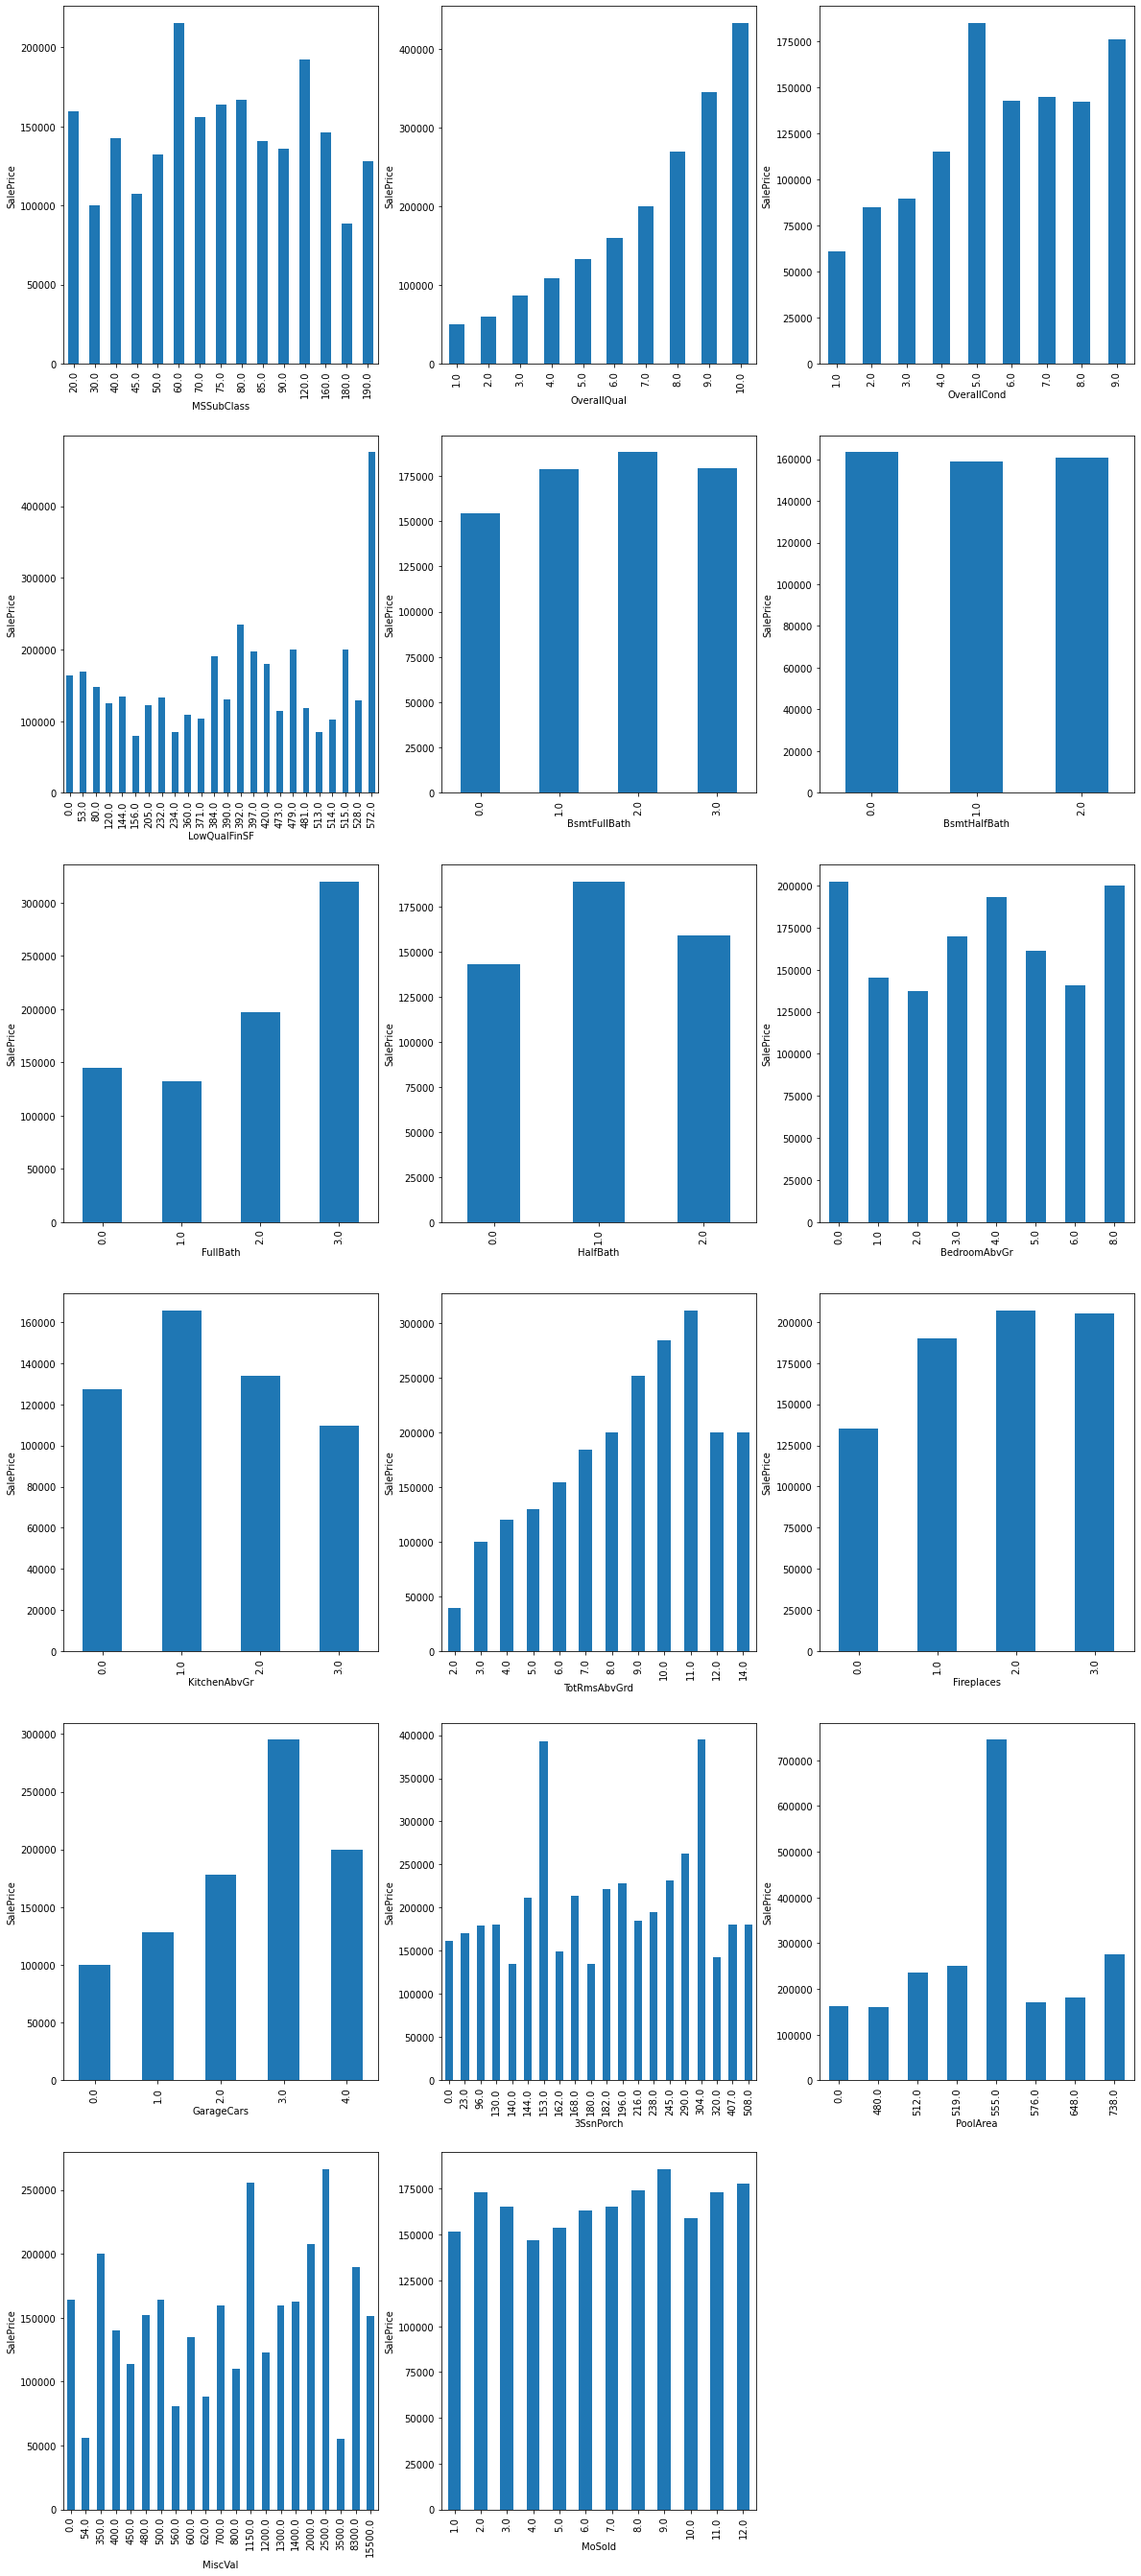

In [40]:
plot_bar_with(df, dis_attrs, "SalePrice")

#### Observations
    - some of the features having some linear realtionship with sale price.i.e. 'OverallQual' hase direct realtion with 'SalePrice', as OverallQual increases SalePrice also increses

### Continuos Features

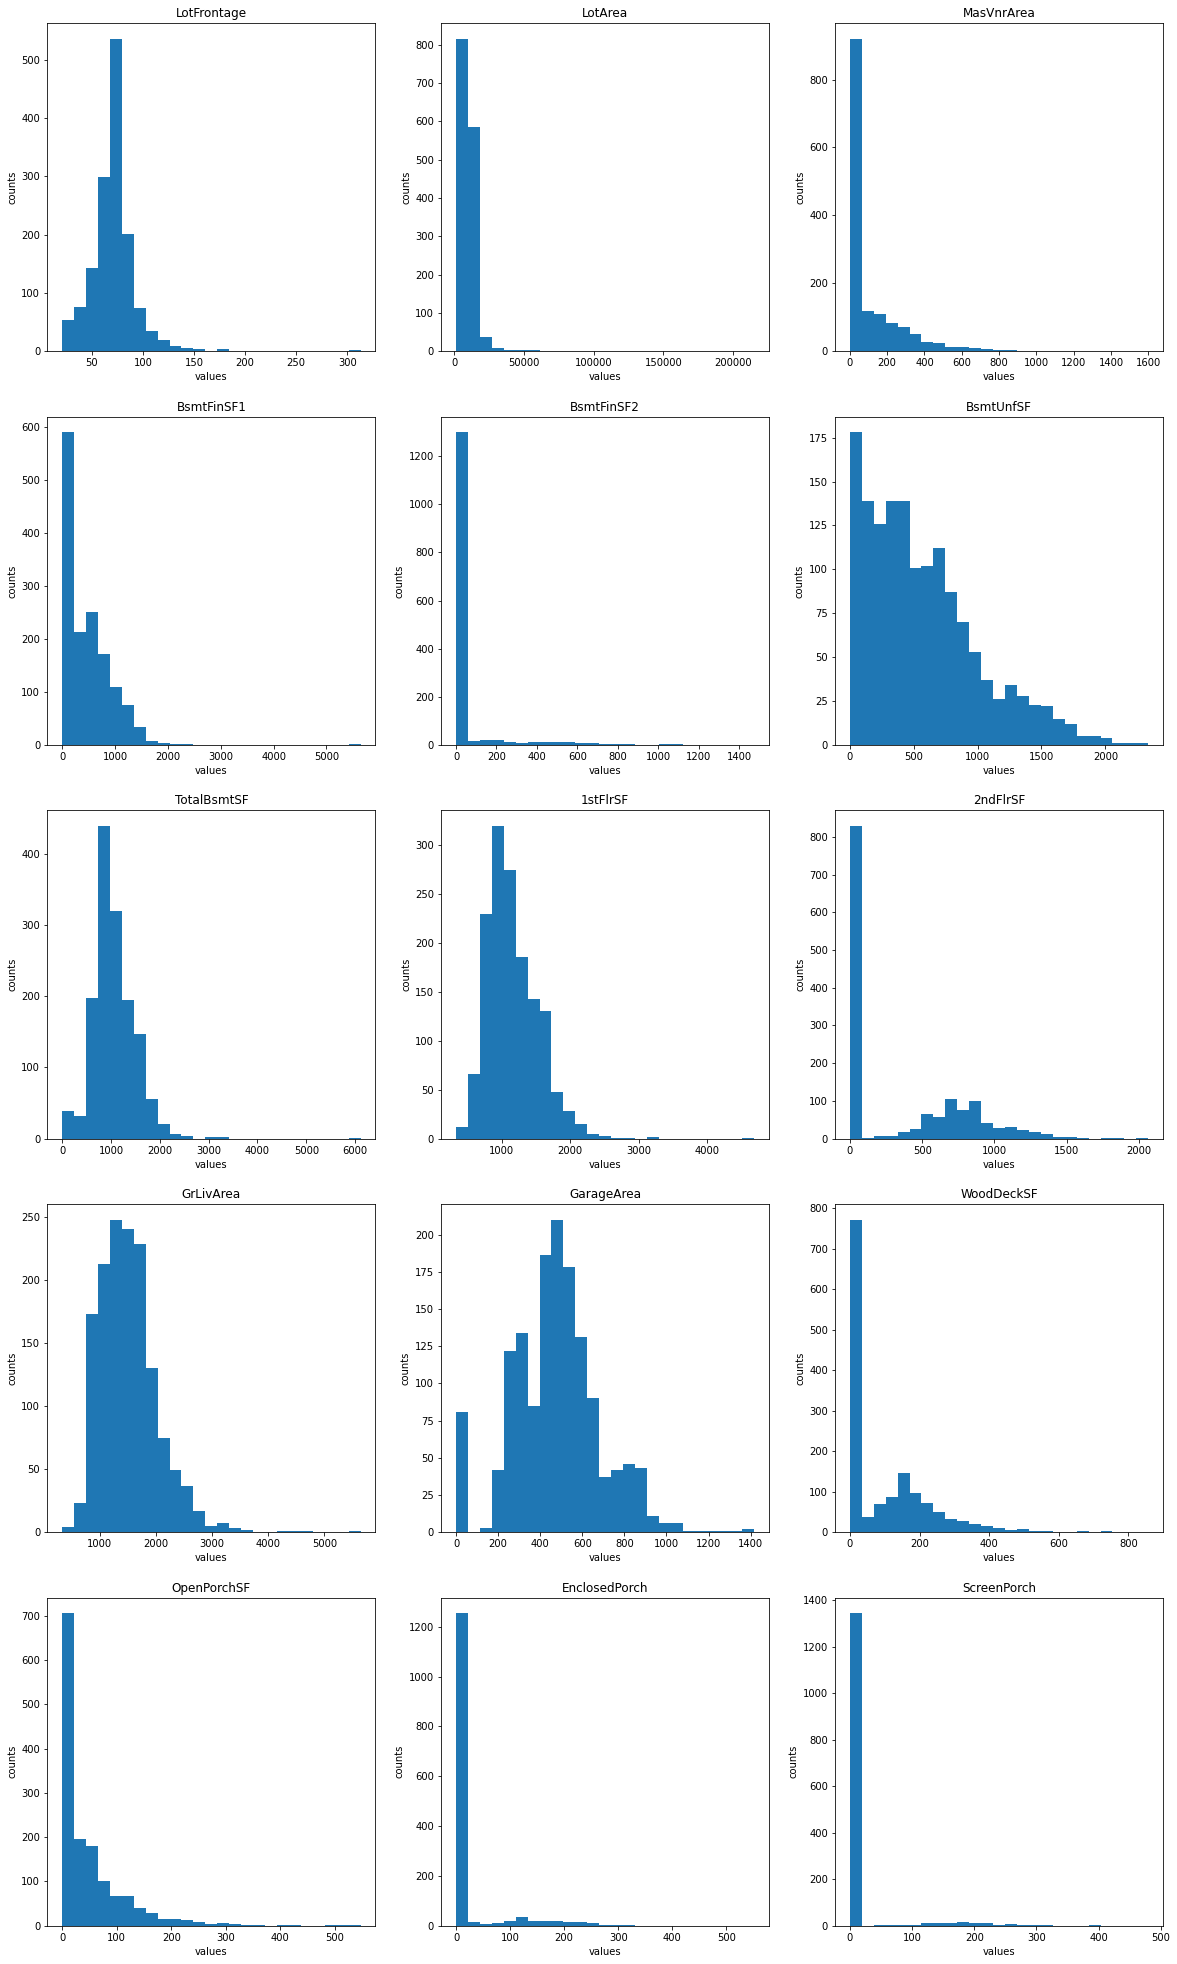

In [41]:
plot_hist(df, cont_attrs)

#### Observations
    - Here features are skewed so we can apply log-transfomation

In [42]:
# log-transformation

df_cont_tr = df[cont_attrs].copy()
for attr in cont_attrs:
    df_cont_tr[attr] = np.log1p(df[attr])

In [43]:
def plot_hist_side_by_side(df1, df2, attr_list1, attr_list2=None, column=2, width=20, height=None):
    if not attr_list2: attr_list2 = attr_list1
    assert len(attr_list1) == len(attr_list2), "attributes list having unequal length"
    row = len(attr_list1)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    attr_list = []
    for attr1, attr2 in zip(attr_list1, attr_list2):
        attr_list.append(attr1)
        attr_list.append(attr2)
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        if i%2 == 0:
            bins = df1[attr].nunique() if df1[attr].nunique() < 25 else 25
            df1[attr].plot.hist(bins=bins)
        else:
            bins = df2[attr].nunique() if df2[attr].nunique() < 25 else 25
            df2[attr].plot.hist(bins=bins)
        plt.title(attr)
        plt.xlabel("Value")
        plt.ylabel("Count")
    plt.show()

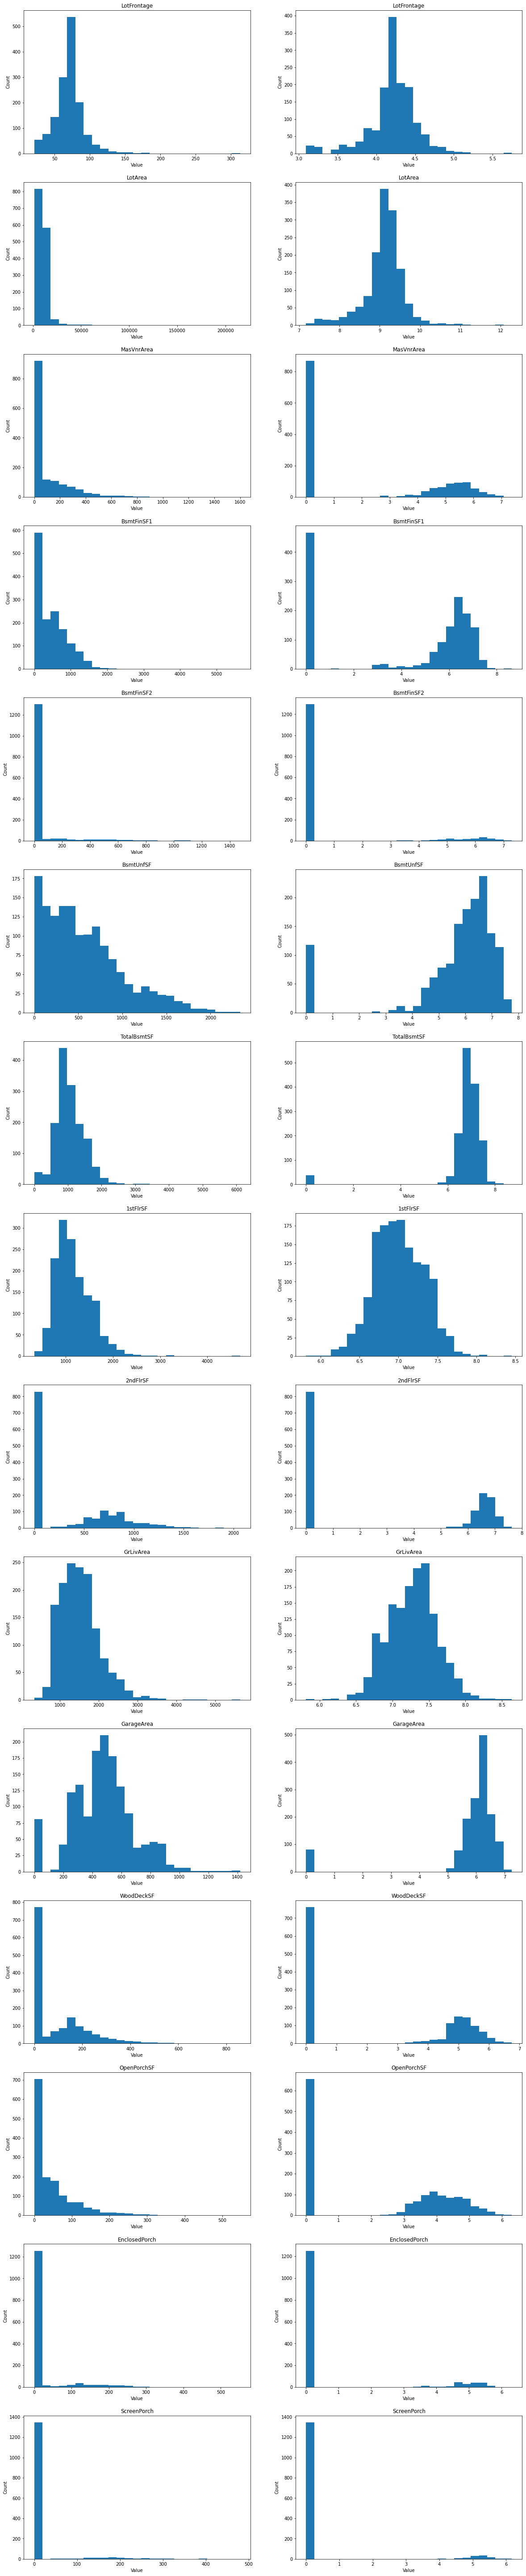

In [44]:
# comparative histogram of defaults vs log-transformed continuos features
plot_hist_side_by_side(df, df_cont_tr, cont_attrs)

#### Observations
    - some featuers are improved in terms of skewness after log-transformation

### Outliers

In [45]:
# finding outliers using boxplotting
def box_plot(df, attr_list, column=3, width=20, height=None):
    attr_list = attr_list.copy()
    for attr in attr_list:
        if 0 in df[attr].unique(): attr_list.remove(attr)
    row = math.ceil(len(attr_list)/column)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))    
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df.boxplot(column=attr)
        plt.ylabel(attr)
        plt.title(attr)
    plt.show()

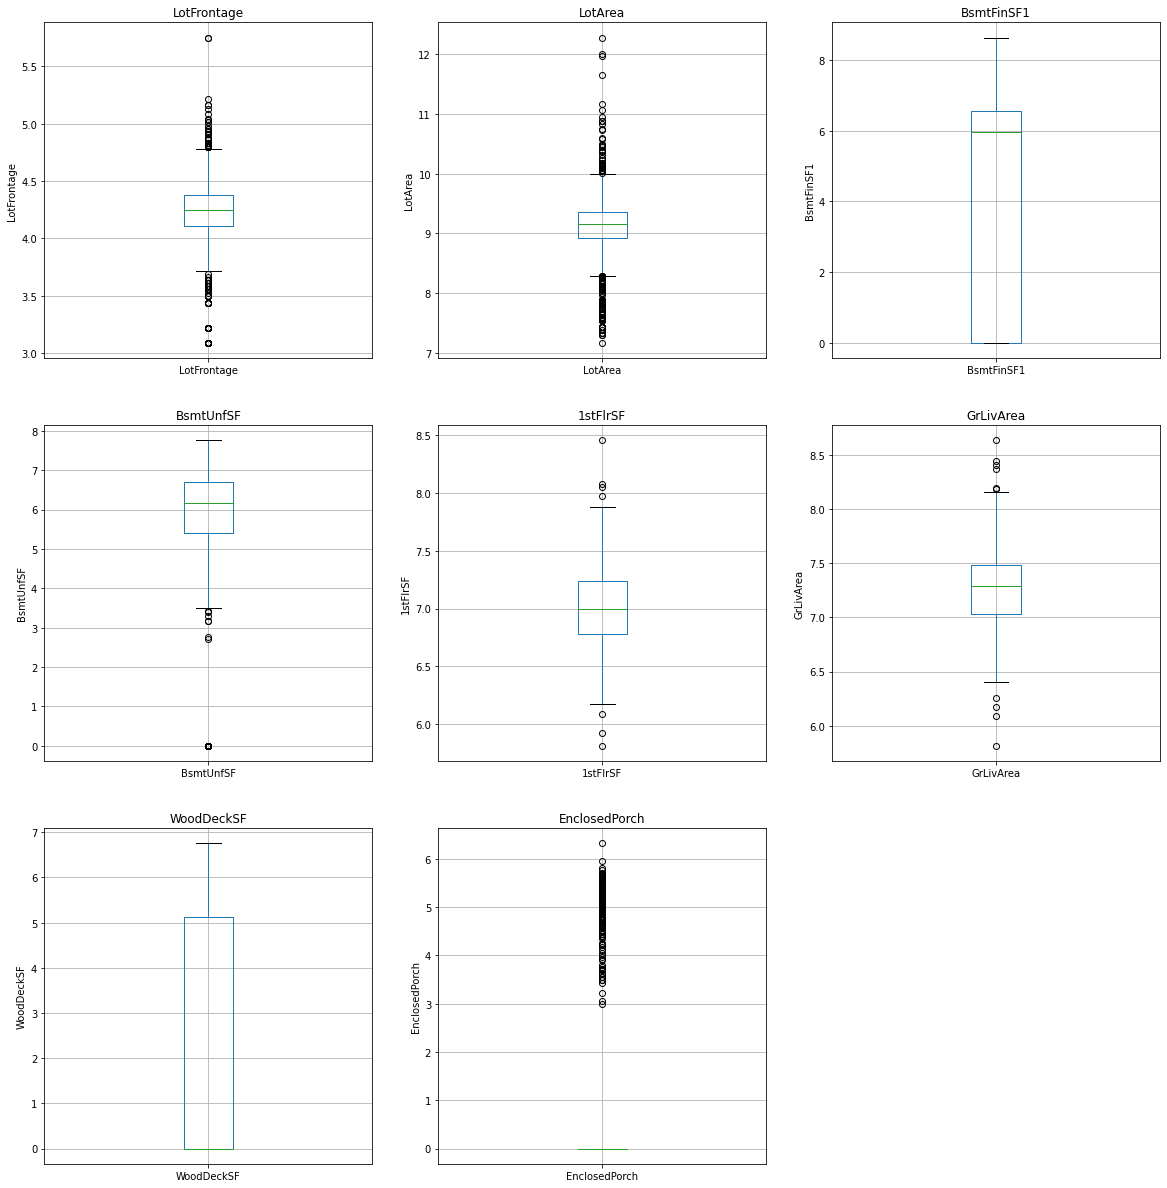

In [46]:
box_plot(df_cont_tr, cont_attrs)

#### Observations
    - Here we can see that outliers exists in some of the features

### Date Time Features

#### Relation with SalePrice

In [47]:
def plot_scatter_with(df, attr_list, with_, column=3, width=20, height=None):
    column = column
    row = math.ceil(len(attr_list)/column)
    width = width
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        plt.scatter(df[attr], df[with_])
        plt.title(attr)
        plt.xlabel(attr)
        plt.ylabel(with_)
    plt.show()

In [48]:
df[date_time_attrs].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003.0,2003.0,2003.0,2008.0
1,1976.0,1976.0,1976.0,2007.0
2,2001.0,2002.0,2001.0,2008.0
3,1915.0,1970.0,1998.0,2006.0
4,2000.0,2000.0,2000.0,2008.0


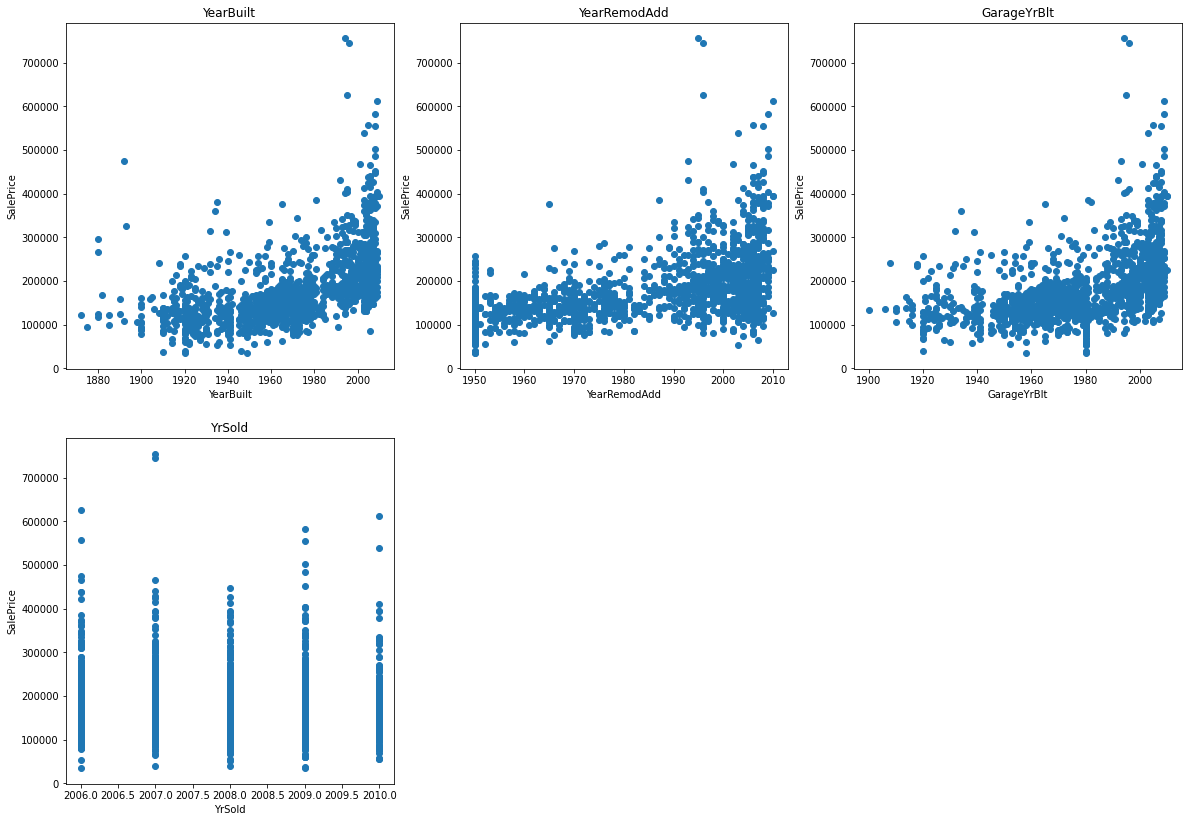

In [49]:
plot_scatter_with(df, date_time_attrs, "SalePrice")

#### Observations
    - as YearBuilt, YearRemodAdd and GarageYrBlt is more recent then SalePrice is significantlly high
    - yearRemodAdd is caped at 1950

### Finding the correlation

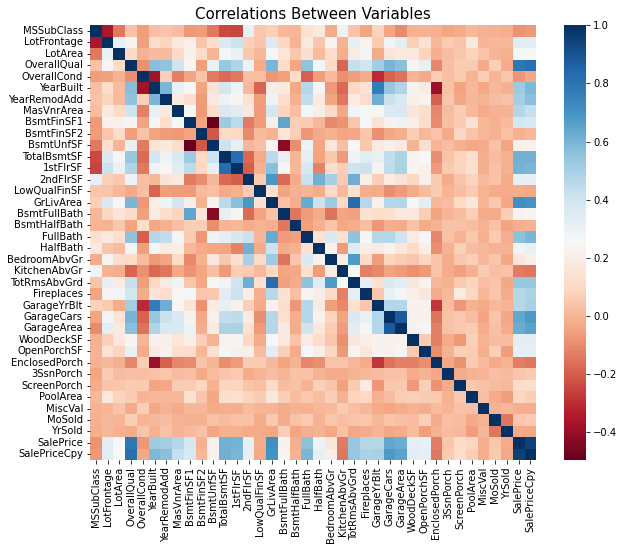

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [51]:
class Correlatiion:
    
    def __init__(self, df, attrs_list, core_with, ratio=0):
        if core_with not in attrs_list: attrs_list.append(core_with)
        self.df = df
        self.attrs_list = attrs_list
        self.core_with = core_with
        self.ratio = ratio
        self.imp = []
        self.all = []
    
    def get_imp_cor_attrs(self):
        if not self.imp: self.find_corr()
        return self.imp

    def find_corr(self):
        corr_matrix = self.df[self.attrs_list].corr()
        srs = corr_matrix[self.core_with].sort_values(ascending=False)
        for index, value in zip(srs.index, srs.values):
            if abs(value) >= self.ratio and index != self.core_with :
                self.imp.append(index)
            self.all.append((index, value))
        return self.all

In [52]:
corr_ = Correlatiion(df, num_attrs, "SalePrice", ratio=0.5)
corr_.find_corr()
num_imp_corr_attrs = corr_.get_imp_cor_attrs()
lib.update_attrs({"num_imp_corr_attrs": num_imp_corr_attrs})

attributes library updated with key:['num_imp_corr_attrs']


In [53]:
corr_.all

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838053),
 ('GrLivArea', 0.7086244776126515),
 ('GarageCars', 0.6404091972583519),
 ('GarageArea', 0.6234314389183622),
 ('TotalBsmtSF', 0.6135805515591943),
 ('1stFlrSF', 0.6058521846919153),
 ('FullBath', 0.5606637627484453),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113866),
 ('MasVnrArea', 0.4726144990045735),
 ('Fireplaces', 0.46692883675152763),
 ('GarageYrBlt', 0.4667536523633407),
 ('BsmtFinSF1', 0.3864198062421535),
 ('LotFrontage', 0.3347708531397599),
 ('WoodDeckSF', 0.32441344456812926),
 ('2ndFlrSF', 0.31933380283206736),
 ('OpenPorchSF', 0.31585622711605504),
 ('HalfBath', 0.28410767559478256),
 ('LotArea', 0.2638433538714051),
 ('BsmtFullBath', 0.22712223313149427),
 ('BsmtUnfSF', 0.21447910554696928),
 ('BedroomAbvGr', 0.16821315430073963),
 ('ScreenPorch', 0.11144657114291112),
 ('PoolArea', 0.09240354949187318),
 ('MoSold', 0.046432245223819446),
 ('3SsnPorc

#### Observations
    - we can clearly identify highly correlated features. it only shows linear relationship not non-linear

### Adding new derived features

In [54]:
lib.attrs["num_attrs"]

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

#### Does combination of overallqual and overallcond improves the correlation with saleprice?

In [55]:
df["NewOveallQual"] = df["OverallQual"] + df["OverallCond"]
# df.drop("NewOveallQual", axis=1, inplace=True)

In [56]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePriceCpy,NewOveallQual
0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,8.0,Typ,0.0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500,12.247694,12.0
1,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6.0,8.0,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,TA,6.0,Typ,1.0,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500,12.109011,14.0
2,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7.0,5.0,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,Gd,6.0,Typ,1.0,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500,12.317167,12.0
3,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7.0,5.0,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,Gd,7.0,Typ,1.0,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000,11.849398,12.0
4,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8.0,5.0,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,Gd,9.0,Typ,1.0,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000,12.429216,13.0


In [57]:
temp_attrs = ["NewOveallQual", "OverallQual", "OverallCond"]
corr_ = Correlatiion(df, temp_attrs, "SalePrice", ratio=0.5)
corr_.find_corr()

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838053),
 ('NewOveallQual', 0.5947863217800172),
 ('OverallCond', -0.07785589404867797)]

####  Obeservations
    - new feature has more than 50% correlation with saleprice but not much impressive

#### Does combination of LotArea and GrLivArea make impact on correlaiton with saleprice?

In [58]:
df["NewArea"] = df["LotArea"] + df["GrLivArea"]
temp_attrs = ["NewArea", "LotArea", "GrLivArea"]
corr_ = Correlatiion(df, temp_attrs, "SalePrice", ratio=0.5)
corr_.find_corr()

[('SalePrice', 1.0),
 ('GrLivArea', 0.7086244776126515),
 ('NewArea', 0.296663436336021),
 ('LotArea', 0.2638433538714051)]

#### Observations
    - new feature does not make any significant impact on correlation

#### Does combination of YearRemodAdd and TotalBsmtSF make impact on correlaiton with saleprice?

In [59]:
df["NewBsmtSF"] = df["YearRemodAdd"] + df["TotalBsmtSF"]
temp_attrs = ["NewBsmtSF", "YearRemodAdd", "TotalBsmtSF"]
corr_ = Correlatiion(df, temp_attrs, "SalePrice", ratio=0.5)
corr_.find_corr()

[('SalePrice', 1.0),
 ('NewBsmtSF', 0.6282119299134524),
 ('TotalBsmtSF', 0.6135805515591943),
 ('YearRemodAdd', 0.5071009671113866)]

#### Observations
    - new feature does make significant impact on correlation

#### Does combination of 1stFlrSF and 2ndFlrSF make impact on correlaiton with saleprice?

In [60]:
df["NewFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
temp_attrs = ["NewBsmtSF", "1stFlrSF", "2ndFlrSF"]
corr_ = Correlatiion(df, temp_attrs, "SalePrice", ratio=0.5)
corr_.find_corr()

[('SalePrice', 1.0),
 ('NewBsmtSF', 0.6282119299134524),
 ('1stFlrSF', 0.6058521846919153),
 ('2ndFlrSF', 0.31933380283206736)]

#### Observations
    - new feature does make significant impact on correlation

In [61]:
num_added_attrs = [c for c in df.columns if c not in labels+num_attrs+cat_attrs+labels_added_attrs+date_time_attrs]
lib.update_attrs({"num_added_attrs": num_added_attrs})

attributes library updated with key:['num_added_attrs']


## EDA for Categorical Features

Categorical data can be classified into ordinal data and nominal data. In the case of an ordinal type, there is a difference in importance for each level. This value plays an important role in the case of regression, so encode it with care.

It is difficult to encode categorical features compared to numeric features. For ordinal data, it is more difficult.

**NOTE:** In the regression problem, discrete and non-order features must be converted to one-hot encoding.

### Separate to nominal and ordinal feature
    - In some cases, it is easy to judge that there is an order on a commonsense level. However, there are many cases where it is difficult to judge that there is an order. The method used in this notebook to determine whether the features are ordinal or not was determined to have a certain order through visualization. However, if you have real estate knowledge, you will be able to determine the order of each level by classifying ordinal features smarter than me. 

In [62]:
for i, attr in enumerate(lib.attrs["cat_attrs"]):
    print(i, attr)

0 MSZoning
1 Street
2 Alley
3 LotShape
4 LandContour
5 Utilities
6 LotConfig
7 LandSlope
8 Neighborhood
9 Condition1
10 Condition2
11 BldgType
12 HouseStyle
13 RoofStyle
14 RoofMatl
15 Exterior1st
16 Exterior2nd
17 MasVnrType
18 ExterQual
19 ExterCond
20 Foundation
21 BsmtQual
22 BsmtCond
23 BsmtExposure
24 BsmtFinType1
25 BsmtFinType2
26 Heating
27 HeatingQC
28 CentralAir
29 Electrical
30 KitchenQual
31 Functional
32 FireplaceQu
33 GarageType
34 GarageFinish
35 GarageQual
36 GarageCond
37 PavedDrive
38 PoolQC
39 Fence
40 MiscFeature
41 SaleType
42 SaleCondition


In [63]:
cat_ord_attrs = ["MSZoning", "Condition1", "Condition2", "HouseStyle", "MasVnrType", 
        "Foundation", "GarageType", "GarageFinish", "PavedDrive", "SaleCondition", 
        "Exterior1st" , "Exterior2nd", "BsmtExposure", "BsmtFinType1", "ExterQual", 
        "ExterCond", "HeatingQC", "BsmtQual", "BsmtCond", "FireplaceQu", "GarageQual", "PoolQC", "KitchenQual"]

# temporary object
cat1 = ['Alley', "MasVnrType", "GarageType", "GarageCond", "Fence", "Street", 
       "LotShape", "LandContour", "BsmtFinType1", "BsmtFinType2", "CentralAir", 
       "MiscFeature", "Utilities", "SaleCondition"," Functional"]
cat2 = ["MSZoning", "PoolQC", "BsmtQual", "BsmtCond", "FireplaceQu", "GarageFinish", 
        "GarageQual", "BsmtExposure", "Electrical", "Exterior1st", "Exterior2nd", "KitchenQual", "SaleType"]

# cat1 is more related to nominal categoires and cat2 is more related to ordinal categories

# as having less domain-knowledge I have selected above category as per ref below
# ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features

In [64]:
cat_nom_attrs = [attr for attr in cat_attrs if attr not in cat_ord_attrs]

In [65]:
lib.update_attrs({"cat_nom_attrs": cat_nom_attrs, "cat_ord_attrs": cat_ord_attrs})

attributes library updated with key:['cat_nom_attrs', 'cat_ord_attrs']


#### Handling Missing Values

In [66]:
df[cat_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
38,PoolQC,1453
40,MiscFeature,1406
2,Alley,1369
39,Fence,1179
32,FireplaceQu,690
33,GarageType,81
36,GarageCond,81
35,GarageQual,81
34,GarageFinish,81
25,BsmtFinType2,38


#### Relationship of missing values with target variable

In [67]:
def plot_bar_with_missing(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    
    attr_list = [attr for attr in df.columns if df[attr].isnull().sum()>=1]
    
    data = df.copy()
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        data[attr] = np.where(data[attr].isnull(), 1, 0)
        data.groupby(attr)[with_].median().plot.bar()
        plt.title(attr)
    plt.show()
    
    del data

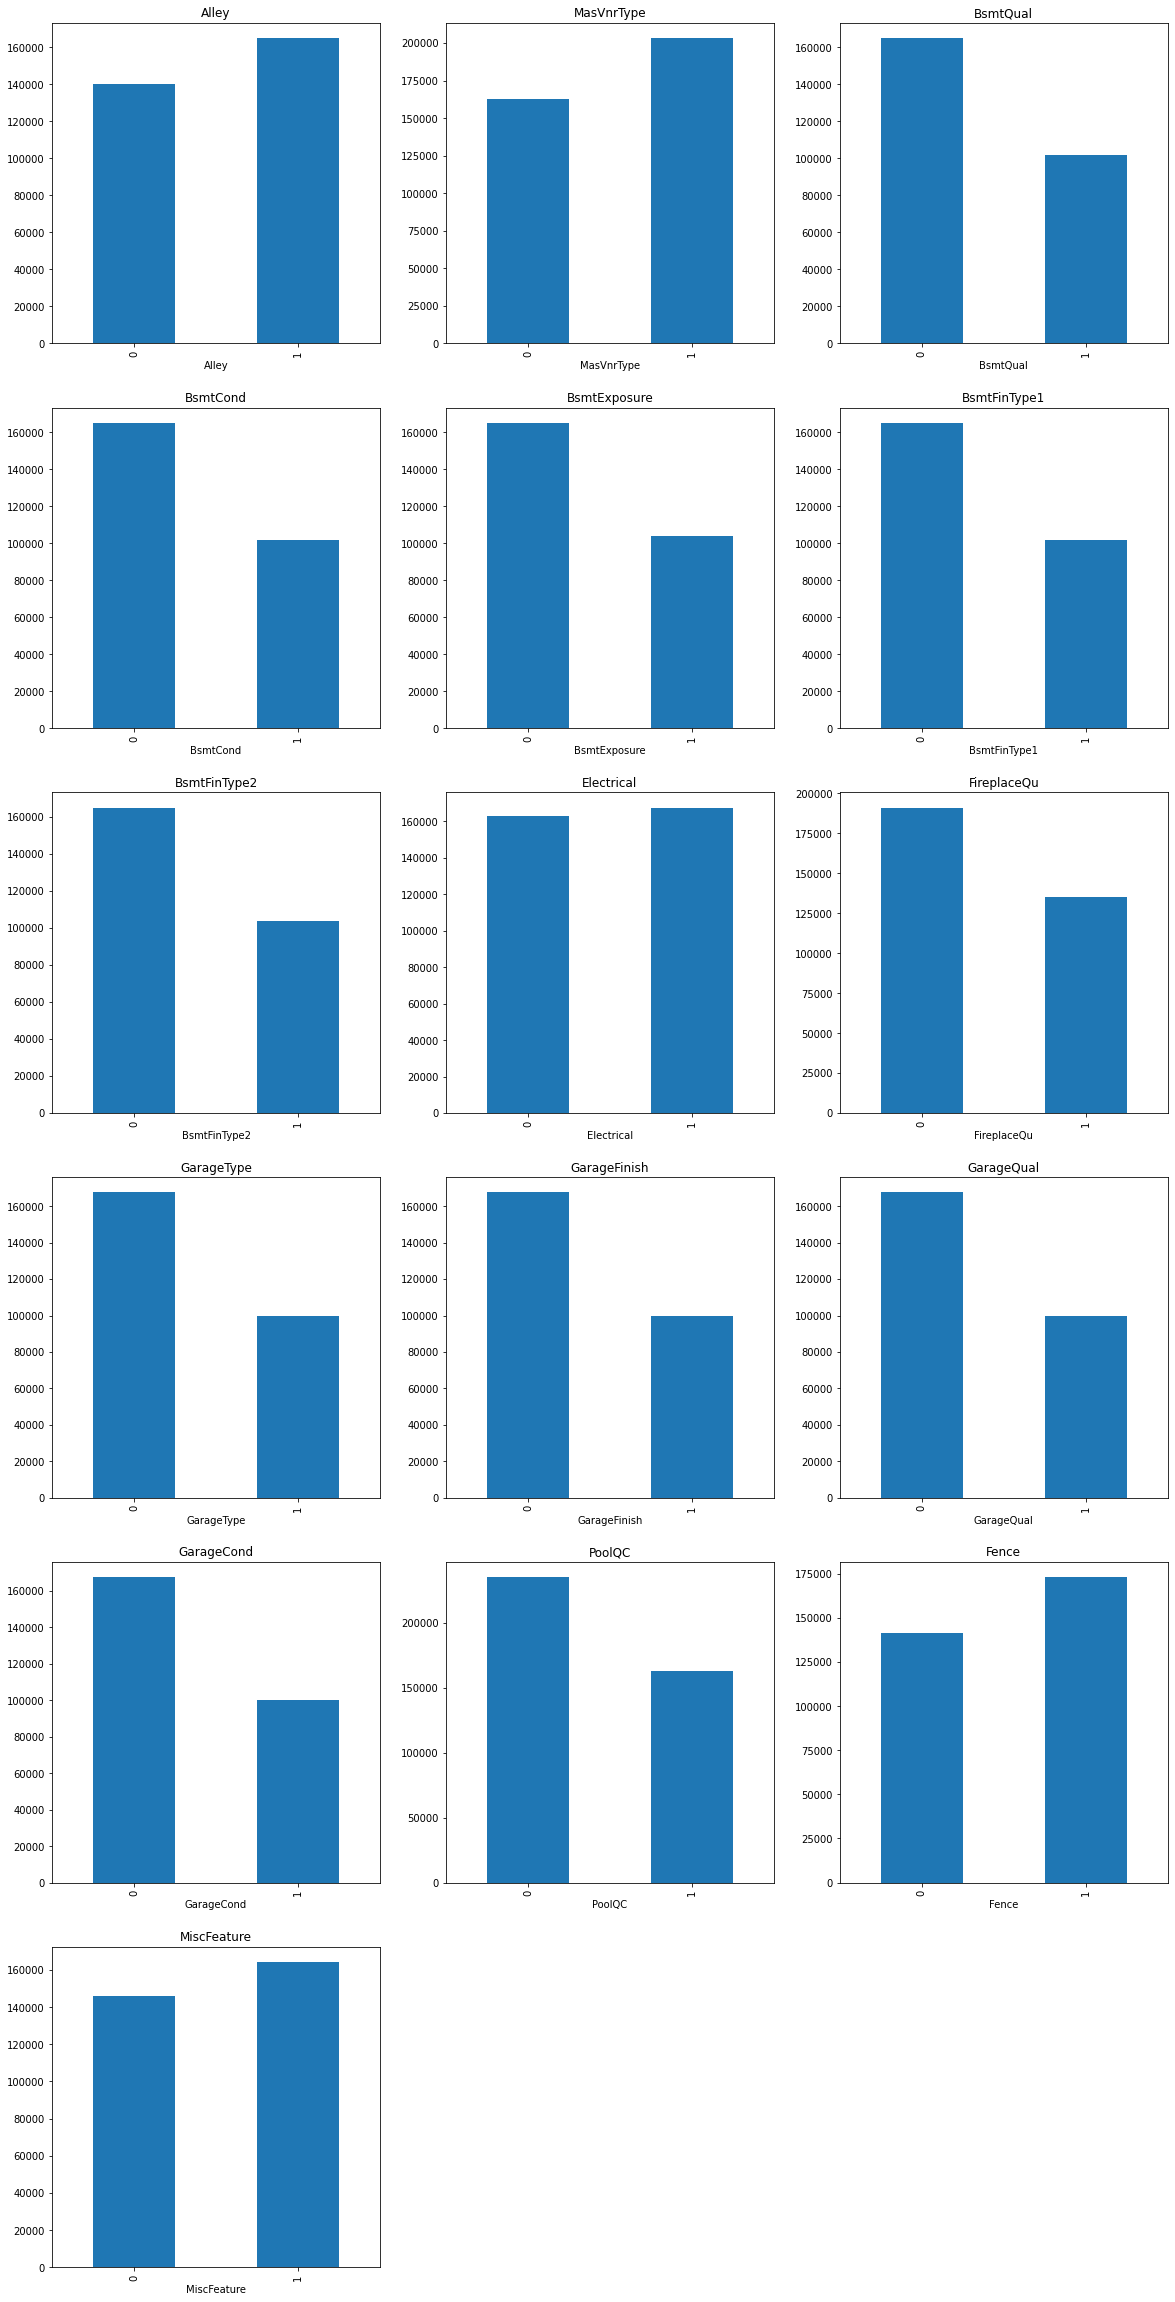

In [68]:
plot_bar_with_missing(df, cat_attrs, "SalePrice")

**NOTE:** Some basic inspections should be done before replacing the missing values

#### Replacing Missing Values
 - Missing values can be replaced with, an arbitory text like 'missing', 'none' etc, or most frequent category in that feature

In [69]:
# most frequent categorical substitution
# df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [70]:
# arbitory text substitution for nominal categories
for attr in cat_nom_attrs:
    df[attr] = df[attr].fillna("missing")

In [71]:
# most fequent categorical substitution for ordinal categorical feature
for attr in cat_ord_attrs:
    df[attr] = df[attr].fillna(df[attr].mode()[0])

In [72]:
df[cat_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
0,MSZoning,0
32,FireplaceQu,0
24,BsmtFinType1,0
25,BsmtFinType2,0
26,Heating,0
27,HeatingQC,0
28,CentralAir,0
29,Electrical,0
30,KitchenQual,0
31,Functional,0


#### Encoding ordinal categorical features
    ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features

In [73]:
df['MSZoning'] = df['MSZoning'].replace({'C (all)':1,'RM':2,'RH':3,'RL':4,'FV':5})

In [74]:
df['Condition1'] = df['Condition1'].replace({'Artery':1,
                                             'RRAe':1,
                                             'RRNn':1,
                                             'Feedr':1,
                                             'RRNe':1,
                                             'RRAn':1,
                                             'Norm':2,
                                             'PosA':3,
                                             'PosN':3})

In [75]:
df['Condition2'] = df['Condition2'].replace({'RRNn':1,
                                             'Artery':2, 
                                             'Feedr':2,
                                             'RRAn':2,
                                             'RRAe':2,    
                                             'Norm':2,
                                             'PosA':3,
                                             'PosN':3})

In [76]:
def HouseStyleToInt(x):
    if(x=='1.5Unf'):
        r = 0
    elif(x=='SFoyer'):
        r = 1
    elif(x=='1.5Fin'):
        r = 2
    elif(x=='2.5Unf'):
        r = 3
    elif(x=='SLvl'):
        r = 4
    elif(x=='1Story'):
        r = 5
    elif(x=='2Story'):
        r = 6  
    elif(x==' 2.5Fin'):
        r = 7          
    else:
        r = 8
    return r

df['HouseStyle'] = df['HouseStyle'].apply(HouseStyleToInt)

In [77]:
def MasVnrTypeToInt(x):
    if(x=='Stone'):
        r = 3
    elif(x=='BrkFace'):
        r = 2
    elif(x=='BrkCmn'):
        r = 1        
    else:
        r = 0
    return r

df['MasVnrType'] = df['MasVnrType'].apply(MasVnrTypeToInt)

In [78]:
foundation_label = {'Slab':1,'BrkTil':2,'Stone':2,'CBlock':3,'Wood':4,'PConc':5}
df['Foundation'] = df['Foundation'].replace(foundation_label)

In [79]:
garagetype_label = {'CarPort':1,'Basment':2,'Detchd':2,'Attchd':3,'2Types':3,'BuiltIn':4}
df['GarageType'] = df['GarageType'].replace(garagetype_label)

In [80]:
df['GarageFinish'] = df['GarageFinish'].replace({'Unf':1,'RFn':2,'Fin':3})

In [81]:
df['PavedDrive'] = df['PavedDrive'].replace({'N':1,'P':2,'Y':3})

In [82]:
salecon_label = {'AdjLand':1,'Abnorml':2,'Family':2,'Alloca':2,'Normal':3,'Partial':4}
df['SaleCondition'] = df['SaleCondition'].replace(salecon_label)

In [83]:
ext_lable = {'AsbShng':1,'AsphShn':1,
             'MetalSd':2,'Wd Sdng':2,'WdShing':2, 'Wd Shng':2,'Stucco':2,'CBlock':2,
             'HdBoard':3,'BrkFace':3,'Plywood':3,'Other':3,
             'VinylSd':4,'CemntBd':4,'BrkComm':4,'CmentBd':4,'Brk Cmn':4,
             'Stone':5,'ImStucc':5 }
df['Exterior1st'] = df['Exterior1st'].replace(ext_lable)
df['Exterior2nd'] = df['Exterior2nd'].replace(ext_lable)

In [84]:
def BsmtExposureToInt(x):
    if(x=='Gd'):
        r = 4
    elif(x=='Av'):
        r = 3
    elif(x=='Mn'):
        r = 2
    elif(x=='No'):
        r = 1
    else:
        r = 0
    return r

df['BsmtExposure'] = df['BsmtExposure'].apply(BsmtExposureToInt)

In [85]:
def BsmtFinType1ToInt(x):
    if(x=='GLQ'):
        r = 6
    elif(x=='ALQ'):
        r = 5
    elif(x=='BLQ'):
        r = 4
    elif(x=='Rec'):
        r = 3   
    elif(x=='LwQ'):
        r = 2
    elif(x=='Unf'):
        r = 1        
    else:
        r = 0
    return r

df['BsmtFinType1'] = df['BsmtFinType1'].apply(BsmtFinType1ToInt)

In [86]:
quality_label = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

df['ExterQual'] = df['ExterQual'].replace(quality_label)
df['ExterCond'] = df['ExterCond'].replace(quality_label)
df['KitchenQual'] = df['KitchenQual'].replace(quality_label)
df['HeatingQC'] = df['HeatingQC'].replace(quality_label)
df['BsmtQual'] = df['BsmtQual'].replace(quality_label)
df['BsmtCond'] = df['BsmtCond'].replace(quality_label)
df['FireplaceQu'] = df['FireplaceQu'].replace(quality_label)
df['GarageQual'] = df['GarageQual'].replace(quality_label)
df['PoolQC'] = df['PoolQC'].replace(quality_label)

In [87]:
df[cat_ord_attrs].head()

,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual
0,4,2,2,6,2,5,3,2,3,3,4,4,1,6,4,3,5,4,3,4,3,4,4
1,4,1,2,5,0,3,3,2,3,3,2,2,4,5,3,3,5,4,3,3,3,4,3
2,4,2,2,6,2,5,3,2,3,3,4,4,2,6,4,3,5,4,3,3,3,4,4
3,4,2,2,6,0,2,2,1,3,2,2,2,1,5,3,3,4,3,4,4,3,4,4
4,4,2,2,6,2,5,3,2,3,3,4,4,3,6,4,3,5,4,3,3,3,4,4


####  Encoding Nominal Categorical Feature

In [88]:
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# onehot_encoder = OneHotEncoder()
# data_onehot = onehot_encoder.fit_transform(df[cat_nom_attrs])
# # print(data_onehot)

# columns = []
# for c in onehot_encoder.categories_:
#     columns += list(c)
    
# df_cat_nom_tr = pd.DataFrame(data_onehot.toarray(), columns=columns).head(10)

In [89]:
# we can do one-hot encoding with pandas also. we can have column names by defaults
df_cat_nom_tr = pd.get_dummies(df[cat_nom_attrs], drop_first=True)

In [90]:
cat_nom_tr_attrs = list(df_cat_nom_tr.columns)
lib.update_attrs({"cat_nom_tr_attrs": cat_nom_tr_attrs})

attributes library updated with key:['cat_nom_tr_attrs']


In [107]:
df2 = pd.concat([df[num_attrs+cat_ord_attrs+num_added_attrs], df_cat_nom_tr], axis=1)

In [108]:
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_missing,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_missing,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500,4,2,2,6,2,5,3,2,3,3,4,4,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500,4,1,2,5,0,3,3,2,3,3,2,2,4,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500,4,2,2,6,2,5,3,2,3,3,4,4,2,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000,4,2,2,6,0,2,2,1,3,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000,4,2,2,6,2,5,3,2,3,3,4,4,3,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [109]:
# bar plot is good for categorical values
def plot_bar_with(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 8 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df.groupby(attr)[with_].median().plot.bar()
        plt.ylabel(with_)
    plt.show()
    

def plot_bar(df, attr_list, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 8 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df[attr].value_counts().plot.bar() 
        plt.title(attr)
        plt.ylabel("Counts")
    plt.show()

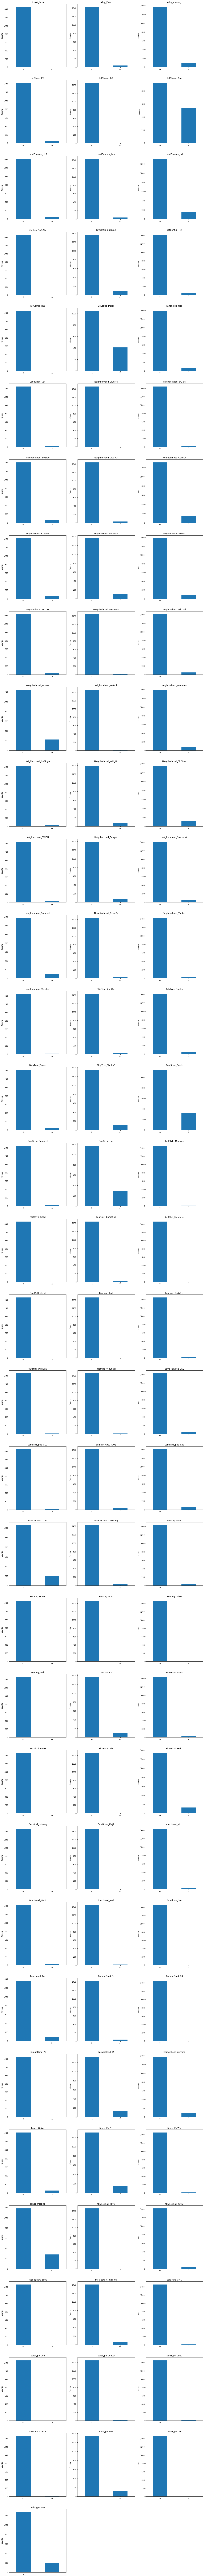

In [110]:
plot_bar(df2, list(df_cat_nom_tr.columns))

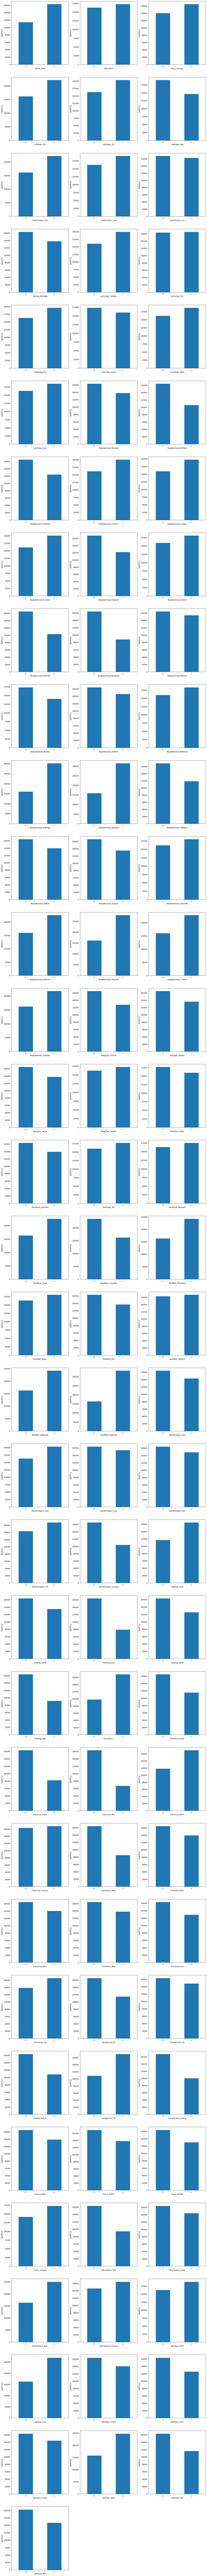

In [111]:
plot_bar_with(df2, list(df_cat_nom_tr.columns), "SalePrice")

## Data Preparaion For ML model

#### Categorising the extra added features

In [118]:
num_added_attrs

['NewOveallQual', 'NewArea', 'NewBsmtSF', 'NewFlrSF']

In [122]:
dis_added_features = []
cont_added_features = []
for attr in num_added_attrs:
    if attr.split("New")[-1] in dis_attrs: dis_added_features.append(attr)
    if attr.split("New")[-1] in dis_attrs: cont_added_features.append(attr)

[]

In [ ]:
dis_added_features 

In [ ]:
cont_added_features

#### Converting continuos features to log-scale

In [112]:
def convert_to_log(df, attr_list):
    df[attr_list] = np.log1p(df[attr_list])
# convert_to_log(df2, cont_attrs+labels) # only run once

#### Inspecting final data with different categories

In [113]:
df2[cont_attrs].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134,0.000000,0.0
1,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000,0.000000,0.0
2,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200,0.000000,0.0
3,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519,5.609472,0.0
4,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651,0.000000,0.0


In [115]:
df2[dis_attrs].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,NewOveallQual,NewArea,NewBsmtSF,NewFlrSF
0,60.0,7.0,5.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,0.0,0.0,0.0,2.0,12.0,10160.0,2859.0,1710.0
1,20.0,6.0,8.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,0.0,0.0,0.0,5.0,14.0,10862.0,3238.0,1262.0
2,60.0,7.0,5.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,0.0,0.0,0.0,9.0,12.0,13036.0,2922.0,1786.0
3,70.0,7.0,5.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,0.0,0.0,0.0,2.0,12.0,11267.0,2726.0,1717.0
4,60.0,8.0,5.0,0.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,0.0,0.0,0.0,12.0,13.0,16458.0,3145.0,2198.0


In [116]:
df2[num_added_attrs].head()

,NewOveallQual,NewArea,NewBsmtSF,NewFlrSF
0,12.0,10160.0,2859.0,1710.0
1,14.0,10862.0,3238.0,1262.0
2,12.0,13036.0,2922.0,1786.0
3,12.0,11267.0,2726.0,1717.0
4,13.0,16458.0,3145.0,2198.0


In [99]:
df2[date_time_attrs].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003.0,2003.0,2003.0,2008.0
1,1976.0,1976.0,1976.0,2007.0
2,2001.0,2002.0,2001.0,2008.0
3,1915.0,1970.0,1998.0,2006.0
4,2000.0,2000.0,2000.0,2008.0


In [100]:
df2[cat_nom_tr_attrs].head()

,Street_Pave,Alley_Pave,Alley_missing,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_missing,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_missing,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [101]:
df2[cat_ord_attrs].head()

,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual
0,4,2,2,6,2,5,3,2,3,3,4,4,1,6,4,3,5,4,3,4,3,4,4
1,4,1,2,5,0,3,3,2,3,3,2,2,4,5,3,3,5,4,3,3,3,4,3
2,4,2,2,6,2,5,3,2,3,3,4,4,2,6,4,3,5,4,3,3,3,4,4
3,4,2,2,6,0,2,2,1,3,2,2,2,1,5,3,3,4,3,4,4,3,4,4
4,4,2,2,6,2,5,3,2,3,3,4,4,3,6,4,3,5,4,3,3,3,4,4


In [102]:
df2[labels].head()

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


#### Observations
    - need to find proper way to scale a discrete and date-time features

### Feature Scaling
    - here scaling is applied to only numerical and categorical features because rest are already scaled
    - also extra added features should be properly classify first before scaling

In [103]:
from sklearn.preprocessing import StandardScaler

stand_scaler = StandardScaler()
df_dis_dt_tr = stand_scaler.fit_transform(df2[dis_attrs+date_time_attrs])

In [104]:
df_dis_dt_tr = pd.DataFrame(df_dis_dt_tr, columns=dis_attrs+date_time_attrs)
df_dis_dt_tr.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,-0.116339,-0.068692,-0.087688,-1.599111,1.050994,0.878668,1.017598,0.138777
1,-0.872563,-0.071836,2.179628,-0.120242,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,-0.489110,0.156734,-0.429577,-0.107927,-0.614439
2,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,0.990891,0.984752,0.830215,0.934226,0.138777
3,0.309859,0.651479,-0.517200,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,-0.116339,-0.068692,-0.087688,-1.599111,-1.863632,-0.720298,0.809167,-1.367655
4,0.073375,1.374795,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,-0.116339,-0.068692,-0.087688,2.100892,0.951632,0.733308,0.892540,0.138777


In [105]:
df3 = pd.concat([df2[cat_nom_tr_attrs+cat_ord_attrs+cont_attrs+labels], df_dis_dt_tr], axis=1)
df3.head()

,Street_Pave,Alley_Pave,Alley_missing,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,...,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,4,4,1,6,4,3,5,4,3,4,3,4,4,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,12.247699,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,-0.116339,-0.068692,-0.087688,-1.599111,1.050994,0.878668,1.017598,0.138777
1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,...,2,2,4,5,3,3,5,4,3,3,3,4,3,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,12.109016,-0.872563,-0.071836,2.179628,-0.120242,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,-0.489110,0.156734,-0.429577,-0.107927,-0.614439
2,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,4,4,2,6,4,3,5,4,3,3,3,4,4,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,12.317171,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,0.990891,0.984752,0.830215,0.934226,0.138777
3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,2,2,1,5,3,3,4,3,4,4,3,4,4,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,11.849405,0.309859,0.651479,-0.517200,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,-0.116339,-0.068692,-0.087688,-1.599111,-1.863632,-0.720298,0.809167,-1.367655
4,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,4,4,3,6,4,3,5,4,3,3,3,4,4,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,12.429220,0.073375,1.374795,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,-0.116339,-0.068692,-0.087688,2.100892,0.951632,0.733308,0.892540,0.138777


#### Finding the correlation of features with target varable

In [106]:
corr1 = Correlatiion(df3, list(df3.columns), "SalePrice", ratio=0.5)
corr1.find_corr()

[('SalePrice', 1.0),
 ('OverallQual', 0.8171846144867668),
 ('GrLivArea', 0.7302537651626396),
 ('GarageCars', 0.6806248726581896),
 ('ExterQual', 0.6788402517304429),
 ('KitchenQual', 0.6678933348195355),
 ('BsmtQual', 0.6571308476171861),
 ('1stFlrSF', 0.6089550420477833),
 ('FullBath', 0.5947706649972526),
 ('YearBuilt', 0.5865701927897153),
 ('GarageFinish', 0.5741186162565839),
 ('YearRemodAdd', 0.5656077814623215),
 ('Foundation', 0.5487950222748104),
 ('TotRmsAbvGrd', 0.5344224002094401),
 ('GarageYrBlt', 0.49579390156043224),
 ('Fireplaces', 0.48944954515748124),
 ('HeatingQC', 0.4737616042820047),
 ('OpenPorchSF', 0.45994791014674286),
 ('GarageArea', 0.45489837833752644),
 ('GarageType', 0.4336476323233218),
 ('MasVnrType', 0.4248132488707388),
 ('MasVnrArea', 0.4133179127442384),
 ('MSZoning', 0.41057432190950216),
 ('Exterior1st', 0.4047924709377965),
 ('LotArea', 0.3999231830717291),
 ('Exterior2nd', 0.38967992212743197),
 ('TotalBsmtSF', 0.37283770045871706),
 ('GarageCon

In [ ]:
less_corr_attrs = []
for tup in  corr1.all:
    if abs(tup[1]) < 0.25: less_corr_attrs.append(tup[0])
lib.update_attrs({"less_core_attrs": less_corr_attrs}) 

In [ ]:
from scipy.stats import chi2_contingency

def chi2_test(df, attrs_list, with_):
    """
    The Chi-Square test of independence is used to determine if there 
    is a significant relationship between two categorical (nominal) variables.
    
    Null Hypothesis (H0): There is no relationship between the variables
    Alternative Hypothesis (H1): There is a relationship between variables
    
    If we choose our p-value level to 0.05, as the p-value test result is more than 
    0.05 we fail to reject the Null Hypothesis. This means, there is no relationship 
    between based on the Chi-Square test of independence.
    
    ref: https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43
    
    Note: chisquare test can only be apply to find relationship between categorical variables
    """
    ral_attrs = [] # relative attributes
    for attr in attrs_list: 
        chi_res = chi2_contingency(pd.crosstab(df[with_], df[attr]))
#         print(f"Chi2 Statistic: {chi_res[0]}, p-value: {chi_res[1]}")
        if chi_res[1] < 0.05: attrs.append(attr)
    return ral_attrs

In [ ]:
def post_hoc_test(df, attrs_list, with_):
    """
    If we have multiple classes within a category, we would not be able to 
    easily tell which class of the features are responsible for the 
    relationship if the Chi-square table is larger than 2×2. To pinpoint which 
    class is responsible, we need a post hoc test. o do this, we could apply 
    OneHotEncoding to each class and create a new cross-tab table against the other feature
    
    However, there is something to remember. Comparing multiple classes against 
    each other would means that the error rate of a false positive compound 
    with each test. For example, if we choose our first test at p-value level 
    0.05 means there is a 5% chance of a false positive; if we have multiple classes, 
    the test after that would compounding the error with the chance become 
    10% of a false positive, and so forth. With each subsequent test, 
    the error rate would increase by 5%. Let's consider we had 3 pairwise 
    comparisons. This means that our Chi-square test would have an error rate of 
    15%. Meaning our p-value being tested at would equal 0.15, which is quite high.
    
    In this case, we could use the Bonferroni-adjusted method for correcting the p-value 
    we use. We adjust our P-value by the number of pairwise comparisons we want to do. 
    The formula is p/N, where p= the p-value of the original test and N= the number of 
    planned pairwise comparisons. For example, in our case, above we have 3 class 
    within the categorical feature; which means we would have 3 pairwise comparisons 
    if we test all the class against the labels(or categorical) feature. Our P-value 
    would be 0.05/3 = 0.0167
    """
    attrs =  [] # relative attributes
    for attr in attrs_list:
        dummies = pd.get_dummies(data=df[attr], columns=[attr]) # creates onehotencoding
        for i in range(len(dummies.columns)):
            p_value = 0.05 / len(dummies.columns)
            chi_res = chi2_contingency(pd.crosstab(df[with_], dummies[dummies.columns[i]]))
#             print(dummies.columns[i])
#             print(f"Chi2 Statistic: {chi_res[0]}, p-value: {chi_res[1]}")
            if chi_res[1] < p_value: attrs.append((attr, dummies.columns[i]))
    return attrs

**IMPORTANT NOTE:** 
- Both the above test is only to find the relation between the two categorical features only.

In [ ]:
# sample test to check chi-square test 
cat_22 = [c for c in cat_attrs if df[c].nunique()<=2] # as chi2 test only for binary class featuers
with_ = "Utilities"
cat_22.remove(with_)
rel_chi_attrs = chi2_test(df, cat_22, with_)
rel_chi_attrs

In [ ]:
# sample test to check post-hoc-test
cat_multiclass = [c for c in cat_attrs if df[c].nunique()>2] # as post-hoc-test is for multiclass features
with_ = "Utilities"
rel_poc_attrs = post_hoc_test(df, cat_multiclass, with_)
rel_poc_attrs

In [ ]:
imp_cat_attrs = [c for c in cat_attrs if c not in lib.attrs["biased_num_cat_attrs"]]
imp_cat_attrs

In [ ]:
lib.update_attrs({"imp_cat_attrs": [""]})

## Model Selection

## Ref
- https://www.kaggle.com/ohseokkim/house-price-all-about-house-price

In [ ]:
cat_attrs

In [ ]:
for f in cat_attrs:
    if f in ["GarageArea","OverallQual","TotalBsmtSF","GrLivArea"]:
        print(f)

## Work Flow

- Basic EDA
    - Indentifying the types of features
- Categorizing the columns. 
    - categorical, numerical(continous, discrete, integer, float etc), datetime, labels, ids etc
- Checking the missing values
    - fint missing values with all the features. May be we can fill the missing values here or later on.
    - we can use different imputer techniques available in sklearn for numerical featuers
- Checking the Target
    - if it is a regression problem then we analyze the distribution of the target and check whether there is necessary preprocessing based on this. If it is a classification problem We need to check target imbalance.
    - for regerssion we can use the logorithmic transformation of label
        - Logarithm function increases the spacing between small numbers and reduces the spacing between large numbers. When certain features are dense with values in small values, by increasing these intervals, our models increase the intervals for small values, and we can improve the performance of the model when training and testing using these values.
- EDA for numerical features
    - Separate the feature like numerical or categorical or date-time or any other
    - inspect discrete and continous features separately
    - detecting the outliers
    - adding New Derived Features using Numerical Feature.
        - Good derivative features come from good questions. Good questions come from a lot of domain-knowledge(knowledge about the dataset domain. i.e here we need to have knowledge about factors affecting the house price).
    - scaling
        - There are various scaling methods for numerical features. if we do a log scaling with dependent feature then same should be apply to independent feature as well.
- EDA for categorical features
    - classify the features into categorical and nominal features
        - In the case of an ordinal type, there is a difference in importance for each level. This value plays an important role in the case of regression, so encode it with care.
    - filling missing values
        - A good way to fill in the missing values of categorical features in the absence of domain-knowledge is to take the most-frequent strategy.
    - checking ordinal features
        - In some cases, it is easy to judge that there is an order on a commonsense level. However, there are many cases where it is difficult to judge that there is an order. The method used in this notebook to determine whether the features are ordinal or not was determined to have a certain order through visualization. However, if you have real estate knowledge, you will be able to determine the order of each level by classifying ordinal features smarter than me
    - Making Derived Features for Categorical Data
        - process for making derived features will be same as like numerical features
- Checking dataset before modeling
    - Missing values check
    - selecting features
        - by correlation
    - Encoding nominal data using one-hot encoding
    - Encoding Target using Log Scaling

Ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features
    
    

In [ ]:
df['Fence'].value_counts()